In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## DSCI 522 – Milestone 1 - Group 25 
### Project Name: Heart Disease Prediction Model

### Team Members:
#### Johnson Chuang | Eduardo Sanches | Azadeh Ramesh | Jose Davila





#### Data analysis and workflow project for DSCI 522 (Data Science Workflows), a course in the Master of Data Science program at the University of British Columbia.


#### **GitHub link:** https://github.com/stoyq/heart-disease-predictor

### Summary

Heart disease is one of the leading causes of death globally, and early detection is critical for prevention and treatment. In this project, we use the UCI Heart Disease dataset to build a machine-learning model that predicts whether a patient is likely to have heart disease based on clinical and physiological attributes. We load the dataset directly from the web, clean and wrangle the data, perform exploratory data analysis (EDA), and train a classification model (Decision Tree) to identify important predictors of heart disease. Our results highlight key risk indicators that align with well-known medical knowledge, demonstrating how machine learning can support early screening and clinical decision-making.

### Introduction 
The objective of this project is to develop a predictive model that determines whether a patient is at risk of heart disease using a set of clinical measurements. Heart disease diagnoses often rely on many interacting factors such as chest pain symptoms, blood pressure, cholesterol levels, and exercise response. Machine-learning models can help uncover patterns in these variables and support early identification of high-risk patients.

Our research question is:

“Given a patient’s clinical and physiological attributes, can we accurately predict whether they have heart disease?”

To answer this question, we use the publicly available Heart Disease dataset from the UCI Machine Learning Repository. This dataset contains multiple medically relevant variables, making it suitable for a classification model such as a Decision Tree.

### Dataset Description

We use the Heart Disease dataset from the UCI Machine Learning Repository, a widely used benchmark dataset for medical prediction tasks. The dataset includes the following 14 attributes:
- Age
- Sex
- Chest Pain Type (cp)
- Resting Blood Pressure (trestbps)
- Cholesterol (chol)
- Fasting Blood Sugar (fbs)
- Resting ECG results (restecg)
- Maximum heart rate achieved (thalach)
- Exercise induced angina (exang)
- ST depression (oldpeak)
- Slope of ST segment (slope)
- Number of major vessels (ca)
- Thalassemia result (thal)
- num (Target: the predicted attribute (0 = no heart disease, 1 = heart disease))

These variables include both continuous and categorical measurements commonly used in clinical diagnostics.

### Methodology
We build a machine-learning classification model using the UCI Heart Disease dataset:

1. Load data from the original source on the web: https://archive.ics.uci.edu/dataset/45/heart+disease

2. Wrangle and clean the data

- Replace missing values
- Assign meaningful column names
- Convert categorical variables to numeric where needed
- Ensure that the target variable is binary (0 = no heart disease, 1 = heart disease)

3. Perform exploratory data analysis (EDA)
- Summary statistics for continuous variables
- Count plots for categorical variables
- Histograms and boxplots to understand feature distributions

4. Create visualizations relevant to the classification task
- Pairplots to explore relationships between key features
- Distribution of target classes
- Feature correlation matrix

5. Build a classification model
- A Decision Tree Classifier is trained to predict heart disease.
- We split the dataset into training and testing subsets and evaluate model accuracy.

6. Visualize the model results
- Plot of the trained Decision Tree
- Feature importance bar chart

### Importing the Dataset

A special note about our data download process: The following code downloads the zip file from UCI's website, unpacks them, and grabs the data of interest (Cleveland data). It is then processed minimally by adding the correct column names, and finally written out as a CSV to the data/processed folder.

In our actual analysis, we fetch the same data directly using UCI's own `ucimlrepo` library. The data is the same. But we include this part to show how you can download the data without UCI's own library.

In [2]:
import os
import requests
import zipfile
from io import BytesIO

import warnings
warnings.filterwarnings("ignore")

# This is the URL to the data. There are many files in the zip file
# In particular we will retrieve the cleveland data
url = "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"

# Make sure the proper data folders exist
os.makedirs("../data/raw", exist_ok=True)
os.makedirs("../data/processed", exist_ok=True)

# Download the zip file into memory
response = requests.get(url)

# Open the zip from memory
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # We only want the Cleveland data
    z.extract("processed.cleveland.data", "../data/raw")

print("Download complete! File saved to data/raw/processed.cleveland.data")

Download complete! File saved to data/raw/processed.cleveland.data


In [3]:
import pandas as pd

cols = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv("../data/raw/processed.cleveland.data", header=None, names=cols)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
# Write out processed data
df.to_csv("../data/processed/cleveland_clean.csv", index=False)
print("Write complete! File saved to data/processed/cleveland_clean.csv")

Write complete! File saved to data/processed/cleveland_clean.csv


### Importing the Dataset Using `ucimlrepo`

As mentioned in the above section, we are fetching the same data. This time we are using the `ucimlrepo` library to do this.

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# Debug metadata (uncomment to see)
#print(heart_disease.metadata) 
  
# Debug variable information (uncomment to see)
#print(heart_disease.variables) 


### Exploratory Data Analysis (EDA)

In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        5
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [10]:
X.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


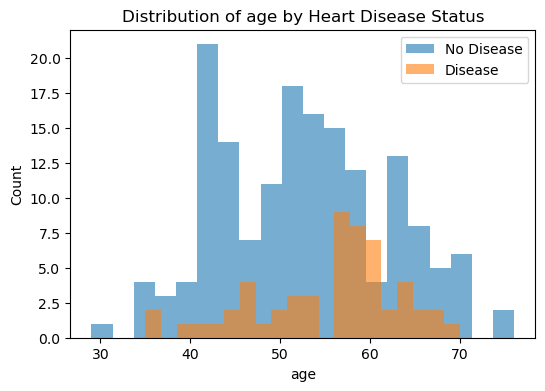

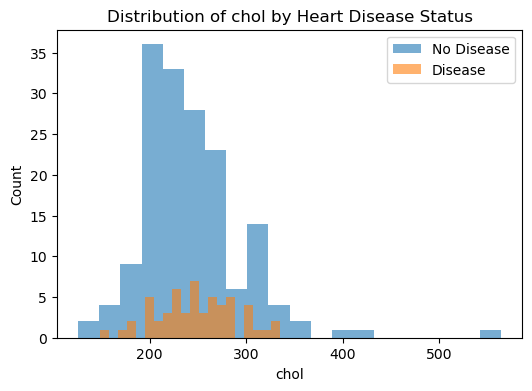

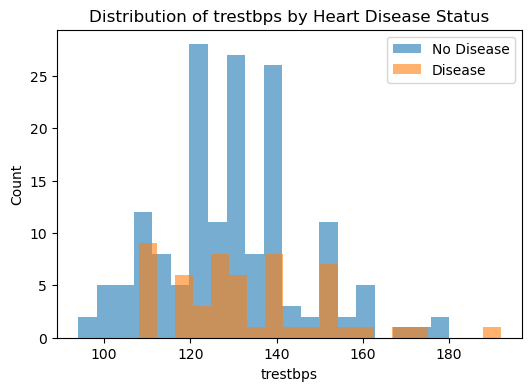

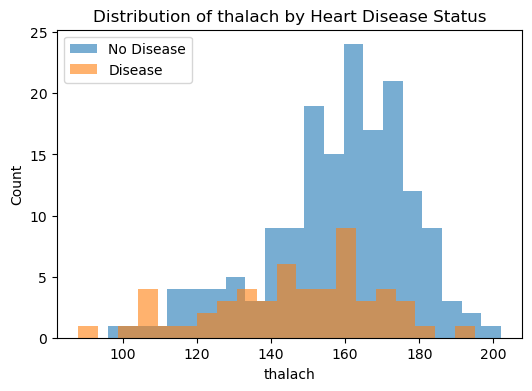

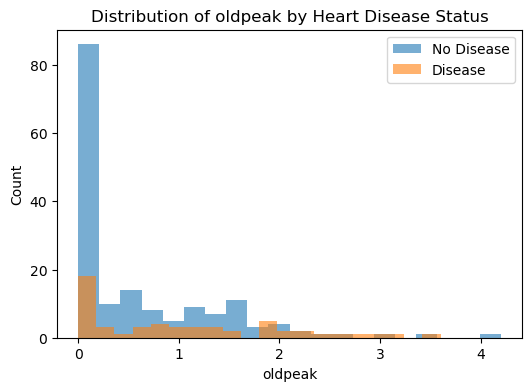

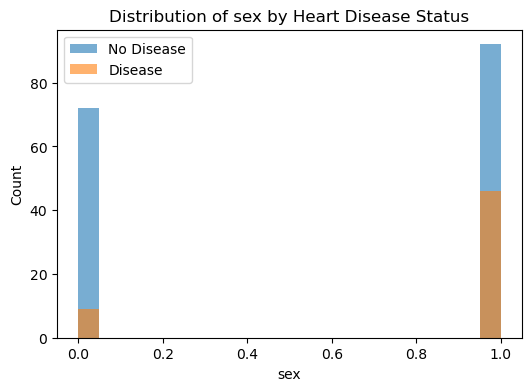

In [11]:
#Merge X and y in df for EDA
df = X.copy()
df["target"] = y

def plot_overlap(feature):
    plt.figure(figsize=(6,4))
    plt.hist(df[df.target == 0][feature], bins = 20, alpha = 0.6, label ="No Disease")
    plt.hist(df[df.target == 1][feature], bins = 20,alpha = 0.6, label = "Disease")
    plt.title(f"Distribution of {feature} by Heart Disease Status")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

plot_overlap("age")
plot_overlap("chol")
plot_overlap("trestbps")
plot_overlap("thalach")
plot_overlap("oldpeak")
plot_overlap("sex")

### Column Transformations

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numerical = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical = ["cp", "restecg", "slope", "ca", "thal"]
binary = ["sex", "fbs", "exang"]

preprocessor = make_column_transformer(
    (StandardScaler() , numerical),
    (OneHotEncoder(handle_unknown = "ignore"), categorical),
    ("passthrough", binary)
)


### Create the Pipeline

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

numeric = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical = ["cp", "restecg", "slope", "ca", "thal"]
binary = ["sex", "fbs", "exang"]

preprocessor = make_column_transformer(
    (StandardScaler() , numeric),
    (OneHotEncoder( handle_unknown = "ignore"), categorical),
    ("passthrough", binary)
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size =0.2, random_state = 123
)

svc_pipe = make_pipeline( preprocessor, SVC())

### Crossvalidation

In [14]:
from sklearn.model_selection import  cross_validate

cross_val_results = {}
cross_val_results['SVC'] = pd.DataFrame(cross_validate(svc_pipe, X_train, y_train, cv =5, return_train_score= True)).agg(['mean', 'std']).round(3).T


cross_val_results['SVC']

,mean,std
fit_time,0.004,0.001
score_time,0.002,0.000
test_score,0.607,0.023
train_score,0.783,0.017


### Fit the Model

In [15]:
svc_pipe.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('onehotencoder', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Predict (X_test) and compatr with Actuals (y_test)

In [16]:

comparison = pd.DataFrame()
comparison["Predictions"] = svc_pipe.predict(X_test)
comparison["Actual"] = y_test.values 

comparison

,Predictions,Actual
0,0,0
1,1,2
2,0,0
3,0,1
4,0,0
...,...,...
56,1,1
57,0,0
58,0,1
59,2,1


### Discussion
The Decision Tree model was able to identify meaningful patterns to predict heart disease based on the data, with a test score of 0.61 and train score of 0.78. Based on these results, it might indicate that there was some overfitting based on the large difference between training and test results.

From the EDA, we see that various features such as age, sex, chol and more have clear differences in their distribution between disease and no disease which will help the model to predict between the two. For a better predictor, we may want to incorporate additional features given the complexity of heart disease.

### Results and Conclusion

Our analysis shows that several clinical features differ noticeably between patients with and without heart disease. As seen in the EDA histograms, patients with heart disease tend to have higher resting blood pressure (trestbps), higher ST-depression values (oldpeak), and lower maximum heart rate achieved (thalach) compared to individuals without disease. After preprocessing the dataset using scaling for numerical variables and one-hot encoding for categorical variables, we trained a Support Vector Classifier (SVC) model. Cross-validation results indicate an average test accuracy of 0.61, with a higher training accuracy of 0.78, suggesting some overfitting. When evaluating predictions on the unseen test set, the model correctly identified many cases but also showed several misclassifications, especially where the model predicted “0” (no disease) but the true label was “1” or “2.” Overall, while the model captures meaningful patterns in the dataset, its moderate predictive performance suggests that further tuning, alternative models, or feature engineering may be needed to improve accuracy and reduce classification bias.

### References
- UCI Machine Learning Repository. Heart Disease Dataset: https://archive.ics.uci.edu/dataset/45/heart+disease
- International application of a new probability algorithm for the diagnosis of coronary artery disease. By R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K. Guppy, S. Lee, V. Froelicher. 1989 Published in American Journal of Cardiology

### Data Validation Checks

### Step 1. Data Types Check

In [17]:
import pandas as pd
import pandera as pa

In [ ]:
# Data Validation 


schema = pa.DataFrameSchema( #Check Correct Colum Names, and Data Types
    {
        "age": pa.Column(int, pa.Check.between(18, 100),nullable=True), #No Outliers -> Check.between
        "sex": pa.Column(int, pa.Check.isin([0, 1]),nullable=True),  #Correct category levels -> Check.isin
        "cp": pa.Column(int, pa.Check.isin([1, 2, 3, 4]),nullable=True), #Missingness OK -> nullable= True 
        "trestbps": pa.Column(int,nullable=True),
        "chol": pa.Column(int,nullable=True),
        "fbs": pa.Column(int, pa.Check.isin([0, 1]),nullable=True),
        "restecg":  pa.Column(int, pa.Check.isin([0, 1, 2]), nullable=True),
        "thalach": pa.Column(int,nullable=True),
        "exang": pa.Column(int, pa.Check.isin([0, 1]),nullable=True),
        "oldpeak": pa.Column(float,nullable=True),
        "slope": pa.Column(int, pa.Check.isin([1, 2, 3]),nullable=True),
        "ca": pa.Column(float, pa.Check.isin([0, 1, 2, 3]),nullable=True),
        "thal": pa.Column(float,nullable=True),
        "target": pa.Column(int, pa.Check.isin([0, 1, 2, 3, 4]),nullable=True) #Target/response variable follows expected distribution
    },
    checks=[
        pa.Check(lambda df: ~df.duplicated().any(), error="Duplicate rows found."),  # No Duplicate Observations
        pa.Check(lambda df: ~(df.isna().all(axis=1)).any(), error="Empty rows found.") # No empty observations

    ]
)

schema.validate(df) #Validated Correct file format


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
from deepchecks.tabular.checks import FeatureLabelCorrelation
from deepchecks.tabular.checks import FeatureFeatureCorrelation

from deepchecks.tabular import Dataset

train_df = X_train.copy()
train_df["target"] = y_train.values


heart_train_ds = Dataset(train_df, label="target", cat_features=["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"])

#Target-Feature Correlation Check - No anomalous target–feature correlations
check_feat_lab_corr = FeatureLabelCorrelation().add_condition_feature_pps_less_than(0.6)
check_feat_lab_corr_result = check_feat_lab_corr.run(dataset=heart_train_ds)

if not check_feat_lab_corr_result.passed_conditions():
    raise ValueError("Feature-Label correlation exceeds the maximum acceptable threshold.")

#Feature-Feature Correlation Check - No anomalous feature–feature correlations
check_feat_feat_corr = FeatureFeatureCorrelation().add_condition_max_number_of_pairs_above_threshold(0.6)
check_feat_feat_corr_result = check_feat_feat_corr.run(dataset=heart_train_ds)

if not check_feat_feat_corr_result.passed_conditions():
    raise ValueError("Feature-Feature correlation exceeds the maximum acceptable threshold.")